# Shapiro-Wilk test for normal and lognormal distributions

In [1]:
import sandy

In [2]:
import logging
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
logging.getLogger().setLevel(logging.WARN)

Generate 5000 xs samples normally and log-normally distributed

In [5]:
tape = sandy.get_endf6_file("jeff_33", "xs", 10010)
njoy_kws = dict(err=1, errorr33_kws=dict(mt=102))
nsmp = 5000
seed = 5

smp_norm = tape.get_perturbations(nsmp, njoy_kws=njoy_kws, smp_kws=dict(seed33=seed, pdf="normal"))[33]
smp_lognorm = tape.get_perturbations(nsmp, njoy_kws=njoy_kws, smp_kws=dict(seed33=seed, pdf="lognormal"))[33]
smp_uniform = tape.get_perturbations(nsmp, njoy_kws=njoy_kws, smp_kws=dict(seed33=seed, pdf="uniform"))[33]

##  Shapiro-Wilk test normal samples and normal distribution

In [6]:
stat_norm = []
stat_lognorm = []
for n in [10, 50, 100, 500, 1000, 5000]:
    df = smp_norm.test_shapiro(pdf="normal", size=n)
    idx = df.statistic.idxmin()
    stat_norm.append(df.loc[idx].rename(n))

    df = smp_norm.test_shapiro(pdf="lognormal", size=n)
    idx = df.statistic.idxmin()
    stat_lognorm.append(df.loc[idx].rename(n))

opts = dict(left_index=True, right_index=True, suffixes=("_norm", "_lognorm"))
pd.DataFrame(stat_norm).merge(pd.DataFrame(stat_lognorm), **opts).rename_axis("# SMP")

C:\Users\lfiorito\Anaconda3\envs\sandy-v1.0\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\lfiorito\Anaconda3\envs\sandy-v1.0\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\lfiorito\Anaconda3\envs\sandy-v1.0\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\lfiorito\Anaconda3\envs\sandy-v1.0\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\lfiorito\Anaconda3\envs\sandy-v1.0\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\lfiorito\Anaconda3\envs\sandy-v1.0\Lib\site-package

,statistic_norm,pvalue_norm,statistic_lognorm,pvalue_lognorm
# SMP,,,,
10,8.63977e-01,8.49913e-02,9.63005e-01,5.99292e-34
50,9.61464e-01,1.02387e-01,9.63005e-01,5.99292e-34
100,9.82641e-01,2.12293e-01,9.63005e-01,5.99292e-34
500,9.90343e-01,2.31122e-03,9.63005e-01,5.99292e-34
1000,9.91175e-01,1.06276e-05,9.63005e-01,5.99292e-34
5000,9.91214e-01,4.49356e-17,9.63005e-01,5.99292e-34


### Plot the distribution of the parameter with closest and farthest resemblance to a normal PDF

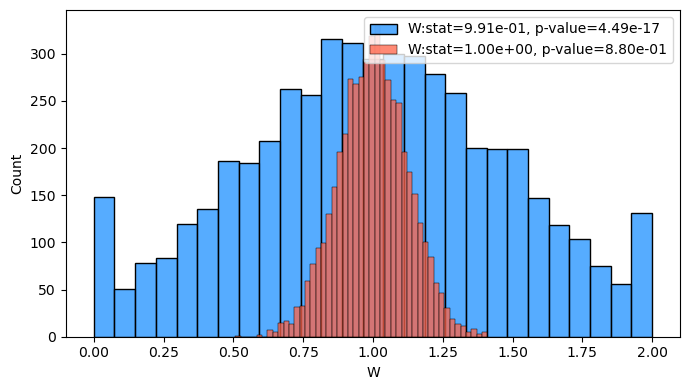

In [7]:
test = smp_norm.test_shapiro(pdf="normal", size=5000)

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)

idx = test.statistic.idxmin()
w = test.loc[idx]
sns.histplot(data=smp_norm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="dodgerblue")

idx = test.statistic.idxmax()
w = test.loc[idx]
sns.histplot(data=smp_norm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="tomato")

ax.set(xlabel="W")
ax.legend()
fig.tight_layout()

## Shapiro-Wilk test for lognormal samples and lognormal distribution

In [8]:
stat_norm = []
stat_lognorm = []
for n in [10, 50, 100, 500, 1000, 5000]:
    df = smp_lognorm.test_shapiro(pdf="normal", size=n)
    idx = df.statistic.idxmin()
    stat_norm.append(df.loc[idx].rename(n))

    df = smp_lognorm.test_shapiro(pdf="lognormal", size=n)
    idx = df.statistic.idxmin()
    stat_lognorm.append(df.loc[idx].rename(n))

opts = dict(left_index=True, right_index=True, suffixes=("_norm", "_lognorm"))
pd.DataFrame(stat_norm).merge(pd.DataFrame(stat_lognorm), **opts).rename_axis("# SMP")

,statistic_norm,pvalue_norm,statistic_lognorm,pvalue_lognorm
# SMP,,,,
10,8.57166e-01,7.06498e-02,9.99667e-01,6.05936e-01
50,9.41139e-01,1.49490e-02,9.99667e-01,6.05936e-01
100,9.51981e-01,1.12302e-03,9.99667e-01,6.05936e-01
500,9.04729e-01,3.88394e-17,9.99667e-01,6.05936e-01
1000,8.97193e-01,2.54045e-25,9.99667e-01,6.05936e-01
5000,8.97651e-01,0.00000e+00,9.99667e-01,6.05936e-01


### Plot the distribution of the parameter with closest and farthest resemblance to a lognormal PDF

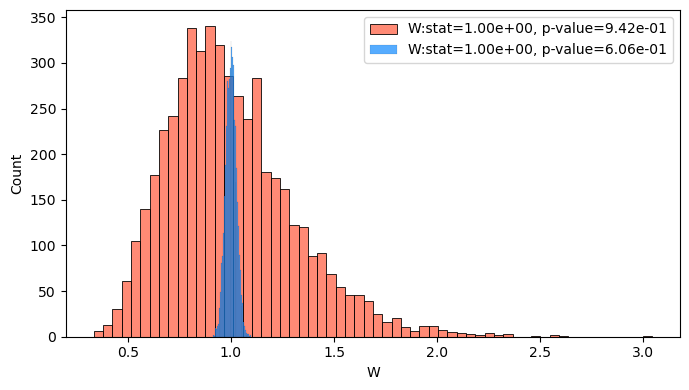

In [9]:
test = smp_lognorm.test_shapiro(pdf="lognormal", size=5000)

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)

idx = test.statistic.idxmax()
w = test.loc[idx]
sns.histplot(data=smp_lognorm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="tomato")

idx = test.statistic.idxmin()
w = test.loc[idx]
sns.histplot(data=smp_lognorm.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="dodgerblue")

ax.set(xlabel="W")
ax.legend()
fig.tight_layout()

## Shapiro-Wilk test for uniform samples and normal distribution

In [10]:
stat_norm = []
stat_lognorm = []
for n in [10, 50, 100, 500, 1000, 5000]:
    df = smp_uniform.test_shapiro(pdf="normal", size=n)
    idx = df.statistic.idxmin()
    stat_norm.append(df.loc[idx].rename(n))

    df = smp_uniform.test_shapiro(pdf="lognormal", size=n)
    idx = df.statistic.idxmin()
    stat_lognorm.append(df.loc[idx].rename(n))

opts = dict(left_index=True, right_index=True, suffixes=("_norm", "_lognorm"))
pd.DataFrame(stat_norm).merge(pd.DataFrame(stat_lognorm), **opts).rename_axis("# SMP")

,statistic_norm,pvalue_norm,statistic_lognorm,pvalue_lognorm
# SMP,,,,
10,7.01850e-01,9.27593e-04,9.08091e-01,0.00000e+00
50,8.92741e-01,2.79088e-04,9.08091e-01,0.00000e+00
100,9.08595e-01,3.66984e-06,9.08091e-01,0.00000e+00
500,9.39673e-01,2.30583e-13,9.08091e-01,0.00000e+00
1000,9.42486e-01,2.97285e-19,9.08091e-01,0.00000e+00
5000,9.50787e-01,4.99444e-38,9.08091e-01,0.00000e+00


### Plot the distribution of the parameter with closest and farthest resemblance to a uniform PDF

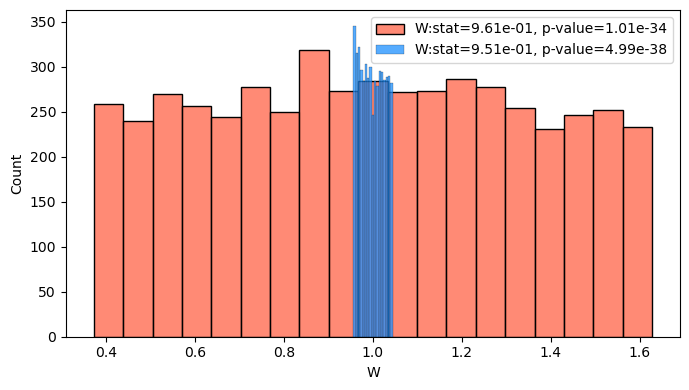

In [11]:
test = smp_uniform.test_shapiro(pdf="uniform", size=5000)

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)

idx = test.statistic.idxmax()
w = test.loc[idx]
sns.histplot(data=smp_uniform.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="tomato")

idx = test.statistic.idxmin()
w = test.loc[idx]
sns.histplot(data=smp_uniform.data.loc[idx], label=f"W:stat={w.statistic:.2e}, p-value={w.pvalue:.2e}", color="dodgerblue")

ax.set(xlabel="W")
ax.legend()
fig.tight_layout()